Importing the libraries numpy, pandas, seaborn, matplotlib



In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Use the multiTimeline.csv data.

In [26]:
df = pd.read_csv('multiTimeline.csv')
print (df)

       Month  Diet  Gym  Finance
0    2004-01   100   31       48
1    2004-02    75   26       49
2    2004-03    67   24       47
3    2004-04    70   22       48
4    2004-05    72   22       43
..       ...   ...  ...      ...
163  2017-08    46   52       43
164  2017-09    44   50       47
165  2017-10    44   47       45
166  2017-11    41   47       47
167  2017-12    39   45       56

[168 rows x 4 columns]


Check the information about the data.

In [27]:
df.info

<bound method DataFrame.info of        Month  Diet  Gym  Finance
0    2004-01   100   31       48
1    2004-02    75   26       49
2    2004-03    67   24       47
3    2004-04    70   22       48
4    2004-05    72   22       43
..       ...   ...  ...      ...
163  2017-08    46   52       43
164  2017-09    44   50       47
165  2017-10    44   47       45
166  2017-11    41   47       47
167  2017-12    39   45       56

[168 rows x 4 columns]>

Converting the 'month' column into a ‘DateTime’ data type and make it the index of the DataFrame

In [28]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.dtypes

Diet       int64
Gym        int64
Finance    int64
dtype: object

Checking with ‘df.head()’:

In [29]:
df.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Visualization

for Diet color is : blue
for Gym color is : green
for Finance color is : red


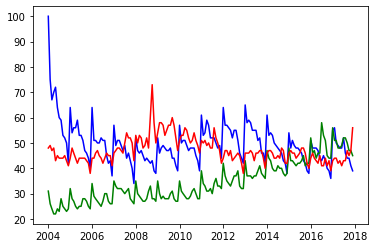

In [30]:
list_items=df.columns
colors=['blue','green','red']
for index in range(len(list_items)):
  print('for {0} color is : {1}'.format(list_items[index],colors[index]))
  plt.plot(df[list_items[index]],colors[index])

Ploting diet only

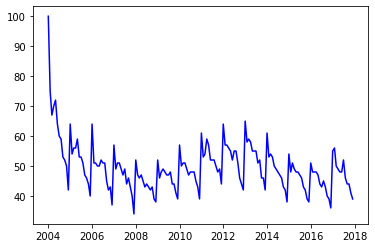

In [31]:
plt.plot(df['Diet'],'blue')

Using the rolling average of ‘diet’ using pandas ‘rolling’ method and Ploting the trend.

<AxesSubplot:xlabel='Month'>

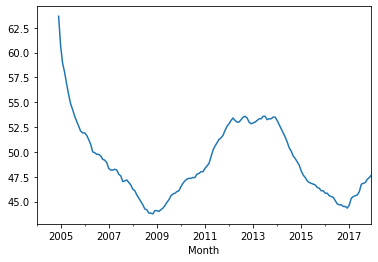

In [32]:
df['Diet'].rolling(12).mean().plot()

Using the rolling average of ‘gym’  using pandas ‘rolling’ method and Ploting the trend.

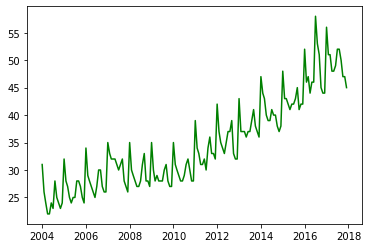

In [33]:
plt.plot(df['Gym'],'green')

Text(0, 0.5, 'Mean')

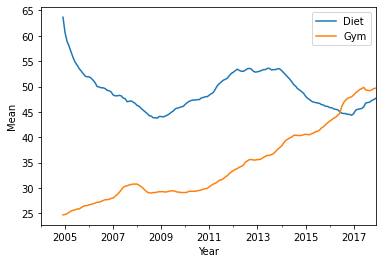

In [34]:
diet_gym = pd.concat([df['Diet'].rolling(12).mean(), df['Gym'].rolling(12).mean()], axis=1) 
diet_gym.plot() 
plt.xlabel('Year')
plt.ylabel('Mean')

Text(0.5, 0, 'Year')

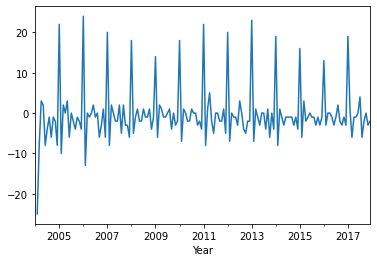

In [35]:
df['Diet'].diff().plot() 
plt.xlabel('Year')

In [36]:
df.head()

,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Checking the correlation among the variables

In [37]:
df.corr()

,Diet,Gym,Finance
Diet,1.000000,-0.100764,-0.034639
Gym,-0.100764,1.000000,-0.284279
Finance,-0.034639,-0.284279,1.000000


Finding the first-order differences

In [38]:
df['Gym'].diff()
df["Differencing Diet"] = df['Diet'].diff()
df["Differencing Gym"] = df['Gym'].diff()
df['Differencing Finance'] = df['Finance'].diff()

In [39]:
df.head()

,Diet,Gym,Finance,Differencing Diet,Differencing Gym,Differencing Finance
Month,,,,,,
2004-01-01,100,31,48,NaN,NaN,NaN
2004-02-01,75,26,49,-25.0,-5.0,1.0
2004-03-01,67,24,47,-8.0,-2.0,-2.0
2004-04-01,70,22,48,3.0,-2.0,1.0
2004-05-01,72,22,43,2.0,0.0,-5.0


Ploting the first-order differences

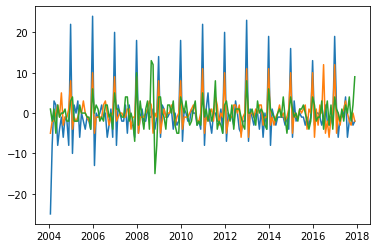

In [40]:
plt.plot(df["Differencing Diet"])
plt.plot(df["Differencing Gym"])
plt.plot(df["Differencing Finance"])

Correlation coefficients of the first-order differences of these time series

In [41]:
df.diff().corr()

,Diet,Gym,Finance,Differencing Diet,Differencing Gym,Differencing Finance
Diet,1.000000,0.758707,0.373828,0.816292,0.608736,0.530929
Gym,0.758707,1.000000,0.301111,0.663931,0.797346,0.482165
Finance,0.373828,0.301111,1.000000,0.205186,0.079988,0.750636
Differencing Diet,0.816292,0.663931,0.205186,1.000000,0.787565,0.453059
Differencing Gym,0.608736,0.797346,0.079988,0.787565,1.000000,0.358326
Differencing Finance,0.530929,0.482165,0.750636,0.453059,0.358326,1.000000


Since the trend is removed, 'Differencing Diet' and 'Differencing Gym' are highly correlated 

Using the autocorrelation plotting interface of pandas.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

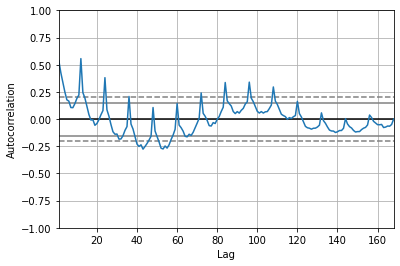

In [42]:
pd.plotting.autocorrelation_plot(df["Diet"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

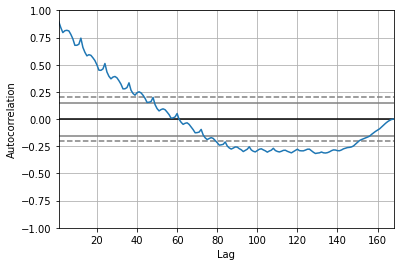

In [43]:
pd.plotting.autocorrelation_plot(df["Gym"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

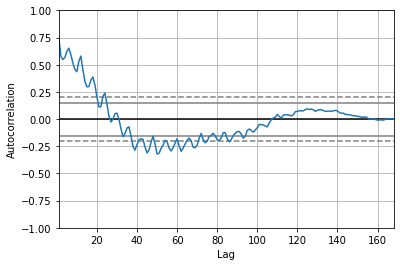

In [44]:
pd.plotting.autocorrelation_plot(df["Finance"])

Dotted lines represent the 95% confidence intervals

Seasonality:

The data trend repeats itself at regular intervals such as weekly and monthly. Such variations in data is called seasonality. Please find the following example. 

In [45]:
df['Year']=df.index.year

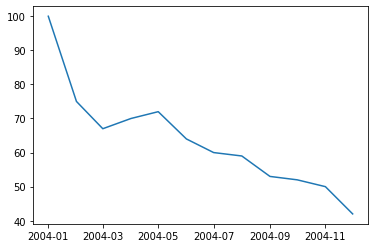

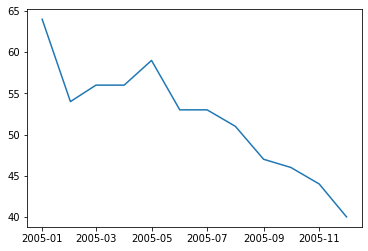

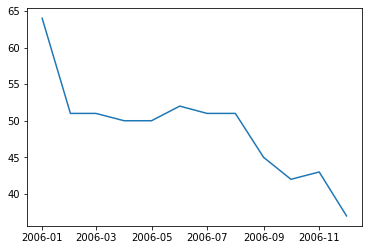

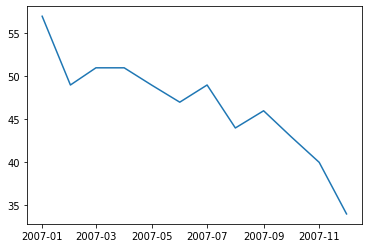

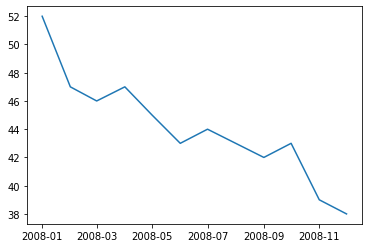

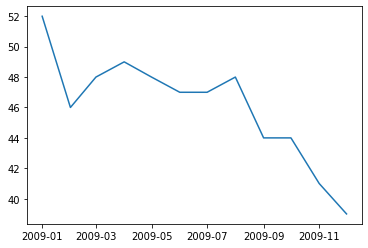

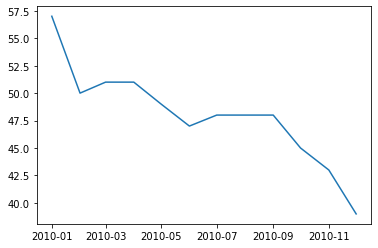

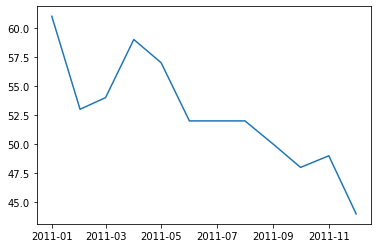

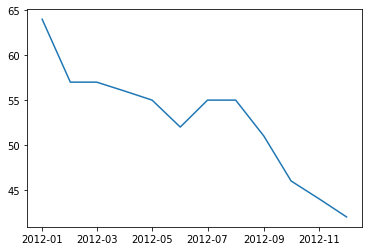

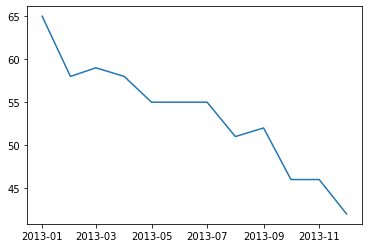

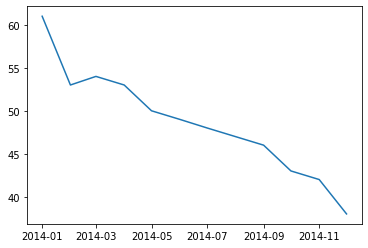

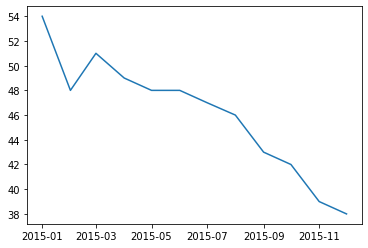

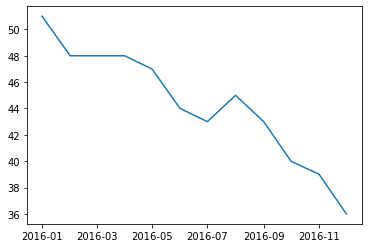

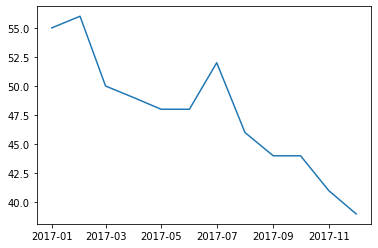

<Figure size 432x288 with 0 Axes>

In [46]:
years= df.index.year.unique().to_list()

for index in range(len(years)):
  year_data= df[df['Year'] == years[index]]
  plt.plot(year_data["Diet"])
  plt.figure()
plt.show()